In [7]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model import RNN

### Preparation ####

# set random seed
seed = 3
np.random.seed(seed)
torch.manual_seed(seed)

# set precision and device
torch.set_default_dtype(torch.float)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

### load dataset ###


def load_data(mode='train'):
    data = np.loadtxt('./data_{}.txt'.format(mode), dtype='str')
    inputs = data[:,:2]
    labels = data[:,2]

    def strs2mat(strings):
        num = strings.shape[0]
        mat = []
        for i in range(num):
            mat.append([*strings[i]])
        return mat

    inputs_ = np.transpose(np.array([strs2mat(inputs[:,0]), strs2mat(inputs[:,1])]), (1,2,0)).astype('float')
    labels_ = np.array(strs2mat(labels))[:,:,np.newaxis].astype('float')

    return inputs_, labels_

inputs_train, labels_train = load_data(mode='train')
inputs_test, labels_test = load_data(mode='test')

inputs_train = torch.tensor(inputs_train, dtype=torch.float, requires_grad=True).to(device)
labels_train = torch.tensor(labels_train, dtype=torch.float, requires_grad=True).to(device)
inputs_test = torch.tensor(inputs_test, dtype=torch.float, requires_grad=True).to(device)
labels_test = torch.tensor(labels_test, dtype=torch.float, requires_grad=True).to(device)

def l1(model):
    l1_reg = torch.tensor(0.).to(device)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return l1_reg
    

model = RNN(hidden_dim=1, device=device).to(device)

cuda


In [2]:
### Training ###

optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.0)
steps = 10001
log = 200
lamb = 0e-4

for step in range(steps):
    
    optimizer.zero_grad()
    
    pred_train = model(inputs_train)
    loss_train = torch.mean((pred_train-labels_train)**2)
    acc_train = 1-loss_train

    pred_test = model(inputs_test)
    loss_test = torch.mean((pred_test-labels_test)**2)
    acc_test = 1-loss_test
    
    reg = l1(model)
    loss = loss_train + lamb * reg
    
    loss.backward()
    optimizer.step()
    
    if step % log == 0:
        print("step = %d | train loss: %.2e | test loss %.2e | train acc: %.2e | test acc: %.2e | reg: %.2e "%(step, loss_train.cpu().detach().numpy(), loss_test.cpu().detach().numpy(), acc_train.cpu().detach().numpy(), acc_test.cpu().detach().numpy(), reg.cpu().detach().numpy()))
    
torch.save(model.state_dict(), './model')

step = 0 | train loss: 7.92e-01 | test loss 7.88e-01 | train acc: 2.08e-01 | test acc: 2.12e-01 | reg: 3.38e+00 
step = 200 | train loss: 1.27e-01 | test loss 1.30e-01 | train acc: 8.73e-01 | test acc: 8.70e-01 | reg: 4.82e+00 
step = 400 | train loss: 3.34e-02 | test loss 3.45e-02 | train acc: 9.67e-01 | test acc: 9.65e-01 | reg: 8.92e+00 
step = 600 | train loss: 9.49e-03 | test loss 9.11e-03 | train acc: 9.91e-01 | test acc: 9.91e-01 | reg: 1.16e+01 
step = 800 | train loss: 4.58e-03 | test loss 4.28e-03 | train acc: 9.95e-01 | test acc: 9.96e-01 | reg: 1.30e+01 
step = 1000 | train loss: 2.79e-03 | test loss 2.57e-03 | train acc: 9.97e-01 | test acc: 9.97e-01 | reg: 1.40e+01 
step = 1200 | train loss: 1.91e-03 | test loss 1.75e-03 | train acc: 9.98e-01 | test acc: 9.98e-01 | reg: 1.47e+01 
step = 1400 | train loss: 1.40e-03 | test loss 1.27e-03 | train acc: 9.99e-01 | test acc: 9.99e-01 | reg: 1.53e+01 
step = 1600 | train loss: 1.07e-03 | test loss 9.71e-04 | train acc: 9.99e-01 |

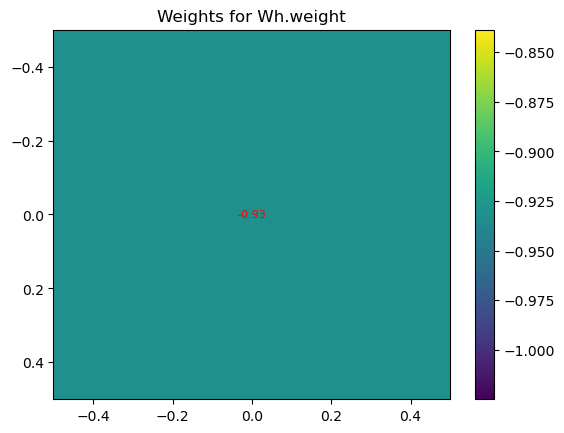

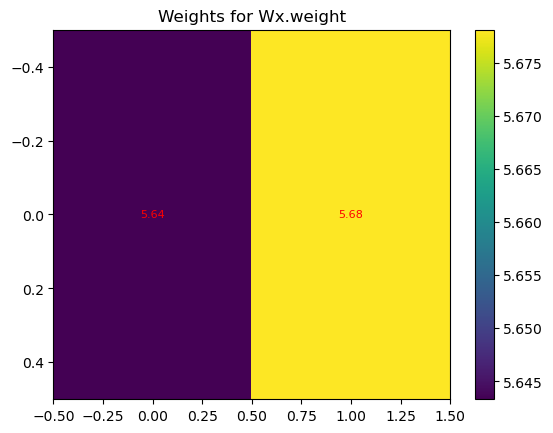

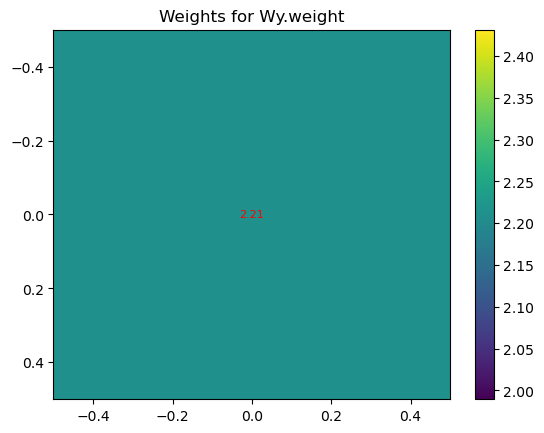

In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model import RNN

# Load the trained model
model.load_state_dict(torch.load('./model'))

# Visualize the weights with values
def visualize_weights_with_values(model):
    for name, param in model.named_parameters():
        if 'weight' in name:  # We're interested in weight parameters
            plt.figure()
            plt.title(f'Weights for {name}')
            weights = param.detach().cpu().numpy()
            plt.imshow(weights, cmap='viridis', aspect='auto')
            plt.colorbar()
            for i in range(weights.shape[0]):
                for j in range(weights.shape[1]):
                    plt.text(j, i, f'{weights[i, j]:.2f}', ha='center', va='center', color='r', fontsize=8)
            plt.show()

# Call the function to visualize the weights with values
visualize_weights_with_values(model)


In [4]:
# Load your trained model (if not already loaded)
# model = RNN(hidden_dim=2, device=device).to(device)
device="cuda"
model.load_state_dict(torch.load('./model'))

# Define a function to test the model
# Define a function to test the model
def test_model(model, inputs, labels):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        inputs = inputs.to(device)  # Ensure inputs are on the same device as the model
        labels = labels.to(device)  # Ensure labels are on the same device as the model
        pred = model(inputs)
        loss = torch.mean((pred - labels)**2)
        print(inputs[0], labels[0], pred[0])
        accuracy = (1-loss).to(torch.float)

    return loss, accuracy


# Test the model on the test dataset
test_loss, test_accuracy = test_model(model, inputs_test, labels_test)

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_accuracy.item() * 100:.2f}%")


tensor([[1., 0.]], device='cuda:0', requires_grad=True) tensor([[0.]], device='cuda:0', requires_grad=True) tensor([[0.0021]], device='cuda:0')
Test Loss: 0.0000
Test Accuracy: 100.00%


In [5]:
sample_input = inputs_test[0:1,:]

with torch.no_grad():
     result = model(sample_input)